
## **12장 Gauss 소거법의 문제점**

**12.1 연립방정식 해 풀기**


$$2x_2 +3x_3 =8$$

$$4x_1 +6x_2 +7x_3 =-3$$

$$2x_1 +x_2 +6x_3 =5$$

행렬로 표현:


$$\left\lbrack \begin{array}{ccc} 0 & 2 & 3\newline 4 & 6 & 7\newline 2 & 1 & 6 \end{array}\right\rbrack \left\lbrack \begin{array}{c} x_1 \newline x_2 \newline x_3  \end{array}\right\rbrack =\left\lbrack \begin{array}{c} 8\newline -3\newline 5 \end{array}\right\rbrack$$

In [1]:
% 문제 1: 연립방정식
A = [0 2 3; 4 6 7; 2 1 6]; % 계수 행렬
b = [8; -3; 5]; % 상수 벡터

% Gauss 소거법 적용
n = length(b);
for i = 1:n-1
    for j = i+1:n
        factor = A(j,i) / A(i,i);
        A(j,i:n) = A(j,i:n) - factor * A(i,i:n);
        b(j) = b(j) - factor * b(i);
    end
end

% 후진 대입법 적용
x = zeros(n,1);
x(n) = b(n) / A(n,n);
for i = n-1:-1:1
    x(i) = (b(i) - A(i,i+1:n)*x(i+1:n)) / A(i,i);
end

% 결과 출력
disp('문제 1의 해 (x_1, x_2, x_3):');

문제 1의 해 (x_1, x_2, x_3):

In [2]:
disp(x);

   NaN
   NaN
   NaN


문제 1의 해에서 <samp>NaN</samp>이 나오는 이유는 첫 번째 행렬의 첫 번째 원소가 0이기 때문입니다. Gauss 소거법에서 첫 번째 피벗 값이 0일 경우 소거 작업이 제대로 수행되지 않아 문제가 발생합니다.


(**예를 들어 소거법에서는 모든 아래의 행들은 전체 행렬의 첫번째 원소로 그 해당행의 첫번째원소를 나눈값을 곱해서 빼주는 것이기 때문에 분모에 0이 들어가면 에러가 납니다**.)


이를 해결하기 위해 행을 교환하여 첫 번째 원소가 0이 아닌 행을 맨 위로 올려야 합니다.


(**피벗방정식(첫번째 방정식)에 포함된 피벗 요소(첫번째 요소)를 피벗화(교환)한다.**)


In [3]:
% 문제 1: 연립방정식
A = [0 2 3; 4 6 7; 2 1 6]; % 계수 행렬
b = [8; -3; 5]; % 상수 벡터

% 행 교환 (첫 번째 열의 첫 번째 원소가 0이므로)
if A(1,1) == 0
    A([1 2], :) = A([2 1], :); % 1행과 2행 교환
    b([1 2]) = b([2 1]);       % 상수 벡터에서도 동일하게 교환
end

% Gauss 소거법 적용
n = length(b);
for i = 1:n-1
    for j = i+1:n
        factor = A(j,i) / A(i,i);
        A(j,i:n) = A(j,i:n) - factor * A(i,i:n);
        b(j) = b(j) - factor * b(i);
    end
end

% 후진 대입법 적용
x = zeros(n,1);
x(n) = b(n) / A(n,n);
for i = n-1:-1:1
    x(i) = (b(i) - A(i,i+1:n)*x(i+1:n)) / A(i,i);
end

% 결과 출력
disp('문제 1의 해 (x_1, x_2, x_3):');

문제 1의 해 (x_1, x_2, x_3):

In [4]:
disp(x);

   -5.4318
    0.0455
    2.6364



**12.2 연립방정식 예제**


다음의 연립방정식을 풀어보시오:


$$3x_1 -0.1x_2 -0.2x_3 =7.85$$

$$0.1x_1 +7x_2 -0.3x_3 =-19.3$$

$$0.3x_1 -0.2x_2 +10x_3 =71.4$$

행렬 풀이 후 해:


$$(x_1 ,x_2 ,x_3 )=(3.0000,-2.5000,7.0000)$$

In [5]:
% 문제 2: 연립방정식
A = [3 -0.1 -0.2; 0.1 7 -0.3; 0.3 -0.2 10]; % 계수 행렬
b = [7.85; -19.3; 71.4]; % 상수 벡터

% Gauss 소거법 적용
n = length(b);
for i = 1:n-1
    for j = i+1:n
        factor = A(j,i) / A(i,i);
        A(j,i:n) = A(j,i:n) - factor * A(i,i:n);
        b(j) = b(j) - factor * b(i);
    end
end

% 후진 대입법 적용
x = zeros(n,1);
x(n) = b(n) / A(n,n);
for i = n-1:-1:1
    x(i) = (b(i) - A(i,i+1:n)*x(i+1:n)) / A(i,i);
end

% 결과 출력

disp('문제 2의 해 (x_1, x_2, x_3):');

문제 2의 해 (x_1, x_2, x_3):

In [6]:
disp(x);

   3.000000000000000
  -2.500000000000000
   7.000000000000002


format long(소수 15자리 적용)


In [7]:
% 문제 2: 연립방정식 풀이 (format long 적용 및 상대 오차 계산)

% 소수점 15자리까지 결과를 표시하도록 설정
format long

% 계수 행렬과 상수 벡터 정의
A = [3 -0.1 -0.2; 0.1 7 -0.3; 0.3 -0.2 10]; % 계수 행렬
b = [7.85; -19.3; 71.4]; % 상수 벡터

% 실제 해 (true solution) (이미지에 주어진 값)
true_x = [3.0000; -2.5000; 7.0000]; % 이미지에서 주어진 실제 값

n = length(b); % 행렬의 크기

% Gauss 소거법: 부분 피벗화 적용
for i = 1:n-1
    % 부분 피벗화: 현재 열에서 가장 큰 값을 찾고 행을 교환
    [~, maxRow] = max(abs(A(i:n,i))); % 절대값이 가장 큰 행을 찾음
    maxRow = maxRow + i - 1; % 실제 행 위치로 조정
    if maxRow ~= i
        A([i maxRow], :) = A([maxRow i], :); % 행 교환
        b([i maxRow]) = b([maxRow i]);       % 상수 벡터도 교환
    end

    % Gauss 소거법 진행: 상삼각 행렬로 변환
    for j = i+1:n
        factor = A(j,i) / A(i,i);
        A(j,i:n) = A(j,i:n) - factor * A(i,i:n);
        b(j) = b(j) - factor * b(i);
    end
end

% 후진 대입법으로 해 구하기
x = zeros(n,1);
x(n) = b(n) / A(n,n); % 마지막 변수를 구함
for i = n-1:-1:1
    x(i) = (b(i) - A(i,i+1:n)*x(i+1:n)) / A(i,i); % 나머지 변수 계산
end

% 결과 출력
disp('format long을 사용한 문제 2의 해 (x_1, x_2, x_3):');

format long을 사용한 문제 2의 해 (x_1, x_2, x_3):

In [8]:
disp(x);

   3.000000000000000
  -2.500000000000000
   7.000000000000002

In [9]:

% 상대 오차 계산 (Absolute Relative Error)
relative_error = abs((true_x - x) ./ true_x);

% 상대 오차 출력
disp('각 변수에 대한 상대 오차:');

각 변수에 대한 상대 오차:

In [10]:
disp(relative_error);

1.0e-15 *
                   0
                   0
   0.253765262771464



-  **수치 기법에서는 오차가 없으나** 컴퓨터의 반올림 오차로 인해 발생.
-  **Gauss 소거법은 이전 결과에 의존하여** 각 단계의 결과값을 계산함.
-  초기 단계에 발생한 오차가 계속해서 전달됨.
-  방정식의 수가 많은 시스템에서는 반올림 오차가 매우 중요함.
-  **100개 이상의 방정식을 다루는 경우 반올림 오차가 매우 중요해진다고** 알려져 있음.
-  **불량 조건 시스템 문제**와도 연결됨.(**민감도와 연결되어 있으며, 민감도가 높으면 안좋은 시스템이다 \-> 개떡같이 말해도 찰떡같이 알아들어야 좋은 시스템!**)

**12.3 불량 조건 시스템**

-  **우량 조건 시스템**: 계수의 변화가 작으면 해도 약간의 변화만 발생
-  **불량 조건 시스템**: 계수의 작은 변화가 해에 커다란 변화를 유발

**예제:**


다음 연립방정식의 두 가지 사례를 비교:


$$\begin{array}{l} x_1 +2x_2 =10\newline 1.1x_1 +2x_2 =10.4 \end{array}$$

1.  첫 번째 시스템의 해:

$$\begin{array}{l} x_1 =\frac{2(10)-2(10.4)}{1(2)-2(1.1)}=4\newline x_2 =\frac{1(10.4)-1.1(10)}{1(2)-2(1.1)}=3 \end{array}$$

1.  두 번째 시스템의 해 (계수가 약간 변경됨):

$$\begin{array}{l} x_1 +2x_2 =10\newline 1.05x_1 +2x_2 =10.4 \end{array}$$

$$\begin{array}{l} x_1 =\frac{2(10)-2(10.4)}{1(2)-2(1.05)}=8\newline x_2 =\frac{1(10.4)-1.1(10)}{1(2)-2(1.05)}=1 \end{array}$$

**결과:**

1.  $\displaystyle 8+2(1)=10$
2. $\displaystyle 1.1(8)+2(1)=10.8\approx 10.4$

계수는 5% 변했지만 독립변수 $x_1 ,x_2$ 는 2배(200%~300%) 이상 변했다


하지만 결과는 4% 변했기 때문에 객관적으로 괜찮은 시스템으로 볼수 있다.


계수가 5% 변했지만 결과는 4% 변했기 때문에 계수의 변화량 보다 결과의 변화량이 적다고 판단되어 $x_1 ,x_2$ 가 참값에 있다고 오해하게 된다.


하지만 이러한 식으로 구한 계수로 인한 참값이 실제 값과 다르기 때문에 내재적인 불안정성이 존재한다.


따라서 **불량 조건 시스템**이란  **엉뚱한 값을 집어 넣게 되어 참 값이 아닌 불량값을 해로 도출한 것을 의미한다.**


원래의 학습데이터에서 계수값을 산출하여 엉뚱한 값을 해로 믿게되어  **기존의 방정식에서만 참값과 유사한 결과값을 도출하는 것을 의미한다.**


계산오차의 경우 민감성이 높은 시스템은 계산오차가 더 커지기 때문에 시스템 불안정성이 더 올라간다. 이러한 시스템도 불량조건 시스템에 해당한다.


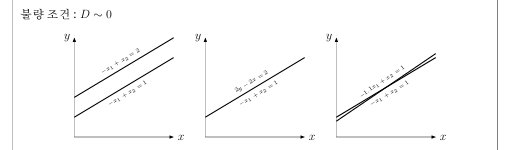


**불량 조건 시스템에서의 기울기와 행렬식:**


**주어진 연립방정식:**


$$a_{11} x_1 +a_{12} x_2 =b_1 ~~\Rightarrow ~~x_2 =-\frac{a_{11} }{a_{12} }x_1 +\frac{b_1 }{a_{12} }$$

$$a_{21} x_1 +a_{22} x_2 =b_2 ~~\Rightarrow ~~x_2 =-\frac{a_{21} }{a_{22} }x_1 +\frac{b_2 }{a_{22} }$$

**기울기가 거의 같다면:**


$$\frac{a_{11} }{a_{12} }\approx \frac{a_{21} }{a_{22} }$$

이 경우:


$$a_{11} a_{22} -a_{12} a_{21} \approx 0$$

따라서 행렬식 $D$ 는 다음과 같이 거의 0이 됩니다:


$$D=\left\lbrack \begin{array}{cc} a_{11}  & a_{12} \newline a_{21}  & a_{22}  \end{array}\right\rbrack \approx 0$$

**불량 조건:**


$$D\sim 0$$


 **따라서 행렬계산(연립방정식) 에서의 불량조건은 두 식의 기울기가 같거나 혹은 너무 유사하면 불량이 발생할 조건이 된다.**


**따라서 D(판별식)이 0에 가까울 수록 불량 시스템이라고 판정할 수 있다.**


**하지만 판별식도 문제가 있다.**


**다음을 보자**


**예제: 다음과 같은 시스템의 행렬식을 계산하시오.**


**(a)**


$$\begin{array}{l} 3x_1 +2x_2 =18\newline -x_1 +2x_2 =2 \end{array}$$

**(b)**


$$\begin{array}{l} x_1 +2x_2 =10\newline 1.1x_1 +2x_2 =10.4 \end{array}$$

**(b) 연립방정식에 10을 곱한 후 행렬식을 구하시오.**


(a)


$$\left\lbrack \begin{array}{cc} 3 & 2\newline -1 & 2 \end{array}\right\rbrack =6+2=8$$

(b)


$$\left\lbrack \begin{array}{cc} 1 & 2\newline 1\ldotp 1 & 2 \end{array}\right\rbrack =2-2\ldotp 2=-0\ldotp 2$$

$$\left\lbrack \begin{array}{cc} 10 & 20\newline 11 & 20 \end{array}\right\rbrack =200-220=-20$$

**행렬식 축척화 (scaling)**


행렬을 축척하여 단순화한 결과:


행렬의 스케일링은 각 행기준으로 가장 큰수로 나눠준다.


$$\left\lbrack \begin{array}{cc} 3 & 2\newline -1 & 2 \end{array}\right\rbrack ~\left\lbrack \begin{array}{cc} 1 & 0\ldotp 667\newline -0\ldotp 5 & 1 \end{array}\right\rbrack =1\ldotp 333$$

$$\left\lbrack \begin{array}{cc} 1 & 2\newline 1\ldotp 1 & 2 \end{array}\right\rbrack ~\left\lbrack \begin{array}{cc} 0\ldotp 5 & 1\newline 0\ldotp 55 & 1 \end{array}\right\rbrack =-0\ldotp 05$$

**특이 (singular) 시스템**

-  **특이 시스템**: 연립방정식 내에 동일한 방정식이 존재하거나 방정식보다 미지수의 개수가 더 많은 시스템.
-  두 방정식이 완전히 동일하면 자유도(degree of freedom)가 1개 줄어듦.(방정식이 하나 줄어들면 자유도가 하나 줄어든다)
-  **특이 시스템의 행렬식**은 0이며, 대규모 시스템에서 행렬식 계산이 어려움.

**특이 시스템의 예:**

-  Gauss 소거법에서 전진 소거 단계를 마친 후 삼각 행렬에서 대각선 요소에 0이 있으면 **특이 시스템**.
-  프로그램에서 계산을 종료하고 사용자에게 특이 시스템임을 알리는 루틴이 추가되어야 함.

**방정식의 갯수가 미지수보다 현저히 많다던지, 미지수의 갯수가 방정식의 갯수보다 현저히 많다던지 하는 문제는 둘다 문제가 될 수 있다.**

## **자세히**

 **1.** **특이 (singular) 시스템**

-  **특이 시스템**이란 연립방정식 내에서 **동일한 방정식**이 존재하거나, **방정식의 수**보다 **미지수의 수**가 많은 시스템을 말합니다.
-  즉, 방정식의 정보가 부족하거나 중복된 정보로 인해 **해를 유일하게 결정하지 못하는 시스템**을 의미합니다.
-  이러한 경우에는 하나의 해를 구할 수 없고, 무한대의 해가 존재하거나, 아예 해가 없을 수도 있습니다.
-  예를 들어, 만약 두 개의 방정식이 완전히 동일한 형태라면, 이 시스템은 자유도(degree of freedom)를 1개 잃게 됩니다. 즉, $n$ 개의 미지수가 있는 연립방정식에서 \*\* $(n-1)$ \*\*개의 방정식만으로 해를 구하게 됩니다. 이는 미지수에 대한 제약 조건이 부족해지므로 해가 결정되지 않거나, 추가적인 자유 변수가 생기게 됩니다.
-  **특이 시스템의 행렬식은 항상 0**이 됩니다.
-  \*\*행렬식(determinant)\*\*은 연립방정식에서 해가 유일한지 여부를 확인할 수 있는 중요한 도구입니다.
-  행렬식이 0이면, 이는 선형 종속 관계가 존재하여 방정식의 해가 유일하지 않다는 것을 의미합니다.
-  따라서 대규모 시스템에서 특이 시스템이 발생하면, **행렬식 계산 자체가 어려워지고** 수치적인 문제를 일으킬 수 있습니다.

 **2.** **Gauss 소거법에서의 특이 시스템 처리**

-  **Gauss 소거법**은 연립방정식을 해결하는 가장 기본적인 방법 중 하나로, 주어진 연립방정식을 단계적으로 소거하여 **상삼각 행렬** 형태로 만들고, 후진 대입법을 사용해 해를 구하는 방법입니다.
-  하지만 **특이 시스템**에서 Gauss 소거법을 적용할 경우, 전진 소거 단계를 마친 후 **대각선 요소에 0**이 나타날 수 있습니다. 이는 방정식이 선형 종속 상태임을 의미합니다.
-  이 경우 Gauss 소거법으로는 더 이상 진행할 수 없으며, 수치적 불안정성으로 인해 해를 정확히 구할 수 없게 됩니다.
-  따라서 **프로그램이 특이 시스템을 탐지하면** 계산을 종료하고 사용자에게 **특이 시스템임을 알리는 루틴**을 추가하는 것이 중요합니다.

 **3.** **불량 조건 시스템 문제에 대한 해결책**


불량 조건 시스템에서 발생하는 수치적 문제를 해결하는 방법에는 다음과 같은 세 가지 주요 방법이 있습니다:

1.  **유효 숫자 증가**

-  **유효 숫자**란 수치 계산에서 정확하게 나타낼 수 있는 숫자의 자릿수를 의미합니다.
-  불량 조건 시스템에서는 계산 과정에서 발생하는 **반올림 오차**가 결과에 큰 영향을 미치게 됩니다.
-  따라서 **계산 정확도를 높이기 위해 유효 숫자를 증가시키는 것**이 불량 조건 시스템에 대한 가장 근본적인 해결책입니다.
-  예를 들어, 소수점 자릿수를 많이 사용하는 고정소수점이나 부동소수점 방식을 개선하거나, 고정밀도의 연산 방식을 채택하는 것이 가능합니다.

1.  **피벗화**

-  **피벗화**는 연립방정식을 풀 때, 계산 과정에서 **가장 큰 값**을 피벗으로 선택해 수치적인 불안정을 줄이는 방법입니다.
-  특히 Gauss 소거법에서 피벗 요소를 선택할 때 **가장 큰 절대값을 가진 요소를 선택**해 계산하는 것이 좋습니다.
-  이는 **부분 피벗화(Partial Pivoting)** 또는 \*\*완전 피벗화(Complete Pivoting)\*\*으로 구분되며, 수치적인 안정성을 높이는 방법입니다.

1.  **축척화 (Scaling)**

-  **축척화**는 방정식이나 행렬을 크기 면에서 균형을 맞추어 계산의 안정성을 높이는 방법입니다.
-  연립방정식에서 어떤 항은 매우 크고, 다른 항은 매우 작은 경우 수치적으로 불안정해질 수 있습니다. 이를 방지하기 위해 **각 방정식 또는 각 행의 요소를 동일한 비율로 나누거나 곱해주는 방식**으로 수치적 문제를 해결할 수 있습니다.
-  축척화는 행렬의 요소들을 **비교적 균일한 크기**로 만들기 때문에, 계산 과정에서 발생할 수 있는 큰 오차를 방지하는 데 도움이 됩니다.


간단한 연습:


$$x_1 +2x_2 =10$$

$$1.1x_1 +2x_2 =10.4$$

In [11]:
% 문제 3: 불량 조건 시스템
A = [1 2; 1.1 2]; % 계수 행렬
b = [10; 10.4]; % 상수 벡터

% Gauss 소거법 적용
n = length(b);
for i = 1:n-1
    for j = i+1:n
        factor = A(j,i) / A(i,i);
        A(j,i:n) = A(j,i:n) - factor * A(i,i:n);
        b(j) = b(j) - factor * b(i);
    end
end

% 후진 대입법 적용
x = zeros(n,1);
x(n) = b(n) / A(n,n);
for i = n-1:-1:1
    x(i) = (b(i) - A(i,i+1:n)*x(i+1:n)) / A(i,i);
end

% 결과 출력
disp('문제 3의 해 (x_1, x_2):');

문제 3의 해 (x_1, x_2):

In [12]:
disp(x);

   4.000000000000009
   2.999999999999996




**추가학습**


**1. 부분 피벗화 (Partial Pivoting)****정의:**


부분 피벗화는 현재 소거를 진행하는 단계에서 **열** 방향으로 가장 큰 절대값을 가진 원소를 선택하고, 그 행을 현재 행과 교환하는 방법입니다. 즉, 현재 계산하려는 열에서 가장 큰 절대값의 피벗을 선택하여 계산의 안정성을 높이는 방식입니다.


**절차:**

1.  현재 소거 단계에서 피벗이 될 행렬의 대각선 원소를 선택하려고 할 때, 그 열에서 가장 큰 절대값을 찾습니다.
2. 그 원소가 있는 행을 현재 피벗 행과 교환합니다.
3. Gauss 소거법을 계속 진행합니다.

**예시:**


행렬 $A$ 가 다음과 같을 때,


$$A=\left\lbrack \begin{array}{ccc} 0 & 2 & 3\newline 4 & 6 & 7\newline 2 & 1 & 6 \end{array}\right\rbrack$$

첫 번째 열에서 0이 피벗으로 선택되면 수치적 불안정성이 발생할 수 있습니다. 이때 부분 피벗화를 사용하여 첫 번째 열에서 절대값이 가장 큰 $4$ 가 있는 두 번째 행을 첫 번째 행과 교환합니다. 그러면 새로운 행렬은 다음과 같이 됩니다:


$$A=\left\lbrack \begin{array}{ccc} 4 & 6 & 7\newline 0 & 2 & 3\newline 2 & 1 & 6 \end{array}\right\rbrack$$

이제 이 행렬을 기준으로 소거를 진행할 수 있습니다.


**장점:**

-  행 교환만으로 해결되므로 계산이 간단하다.
-  대부분의 수치적 불안정성을 해결할 수 있다.

**단점:**

-  열에서만 피벗을 고려하므로 모든 경우에서 완벽한 안정성을 보장하지 못할 수 있다.

In [13]:
% 부분 피벗화를 사용한 Gauss 소거법 예시

% 계수 행렬과 상수 벡터 정의
A = [0 2 3; 4 6 7; 2 1 6]; % 계수 행렬
b = [8; -3; 5]; % 상수 벡터

n = length(b); % 행렬의 크기

% Gauss 소거법: 부분 피벗화 적용
for i = 1:n-1
    % 부분 피벗화: 현재 열에서 가장 큰 값을 찾고 행을 교환
    [~, maxRow] = max(abs(A(i:n,i))); % 절대값이 가장 큰 행을 찾음
    maxRow = maxRow + i - 1; % 실제 행 위치로 조정
    if maxRow ~= i
        A([i maxRow], :) = A([maxRow i], :); % 행 교환
        b([i maxRow]) = b([maxRow i]);       % 상수 벡터도 교환
    end

    % Gauss 소거법 진행: 상삼각 행렬로 변환
    for j = i+1:n
        factor = A(j,i) / A(i,i);
        A(j,i:n) = A(j,i:n) - factor * A(i,i:n);
        b(j) = b(j) - factor * b(i);
    end
end

% 후진 대입법으로 해 구하기
x = zeros(n,1);
x(n) = b(n) / A(n,n); % 마지막 변수를 구함
for i = n-1:-1:1
    x(i) = (b(i) - A(i,i+1:n)*x(i+1:n)) / A(i,i); % 나머지 변수 계산
end

% 결과 출력
disp('부분 피벗화를 사용한 해 (x_1, x_2, x_3):');

부분 피벗화를 사용한 해 (x_1, x_2, x_3):

In [14]:
disp(x);

  -5.431818181818182
   0.045454545454546
   2.636363636363636




**2.** **완전 피벗화 (Complete Pivoting)****정의:**


완전 피벗화는 행렬에서 현재 소거 단계에서 **행과 열**을 모두 고려하여, 전체 행렬에서 가장 큰 절대값을 가진 원소를 피벗으로 선택하고, 그 원소가 있는 행과 열을 현재의 행과 열과 교환하는 방법입니다. 즉, 전체 행렬에서 가장 큰 원소를 선택하여 계산의 안정성을 극대화하는 방식입니다.


**절차:**

1.  현재 소거할 단계에서 행과 열을 모두 살펴보고, 행렬 내에서 가장 큰 절대값을 찾습니다.
2. 그 원소가 위치한 행과 열을 각각 현재의 피벗 행과 피벗 열과 교환합니다.
3. Gauss 소거법을 계속 진행합니다.

**예시:**


같은 행렬 $A$ 에서 완전 피벗화를 적용하면, 첫 번째 열과 행만을 고려하는 것이 아니라 전체 행렬을 확인합니다. 여기서 가장 큰 절대값은 $7$ 이므로, 이 원소가 있는 피벗요소열을 순차적으로 교환하고, 해당 행도 교환하여 새로운 행렬을 만듭니다:


원래행렬 $A$


$$A=\left\lbrack \begin{array}{ccc} 0 & 2 & 3\newline 4 & 6 & 7\newline 2 & 1 & 6 \end{array}\right\rbrack$$

열교환(피벗요소열 교환)


$$A=\left\lbrack \begin{array}{ccc} 3 & 0 & 2\newline 7 & 4 & 6\newline 6 & 2 & 1 \end{array}\right\rbrack$$

행교환


$$A=\left\lbrack \begin{array}{ccc} 7 & 4 & 6\newline 3 & 0 & 2\newline 6 & 2 & 1 \end{array}\right\rbrack$$

이제 이 행렬을 기준으로 소거를 진행합니다.


**장점:**

-  수치적으로 매우 안정적이며, 모든 경우에서 안정성을 높여줍니다.
-  행과 열을 모두 고려하므로, 부분 피벗화보다 더 안전한 방식입니다.

**단점:**

-  계산이 복잡해지고, 매 소거 단계마다 행과 열을 교환해야 하므로 연산량이 많아집니다.
-  코드 구현 및 계산 속도가 부분 피벗화에 비해 상대적으로 느려질 수 있습니다.

In [15]:
% Gauss 소거법: 완전 피벗화 적용
A = [0 2 3; 4 6 7; 2 1 6]; % 계수 행렬
b = [8; -3; 5]; % 상수 벡터
n = length(b); % 변수의 개수

% 행과 열의 순서를 기록하는 벡터
col_order = 1:n;

% 완전 피벗화 및 Gauss 소거법
for i = 1:n-1
    % 남은 부분 행렬에서 가장 큰 절대값을 가진 원소 찾기
    [~, max_idx] = max(abs(A(i:n, i:n)), [], 'all', 'linear');
    [maxRow, maxCol] = ind2sub([n-i+1, n-i+1], max_idx);
    maxRow = maxRow + i - 1; % 전체 행렬에서의 행 위치
    maxCol = maxCol + i - 1; % 전체 행렬에서의 열 위치

    % 행 교환
    if maxRow ~= i
        A([i maxRow], :) = A([maxRow i], :);
        b([i maxRow]) = b([maxRow i]);
    end

    % 열 교환 (열 순서 기록을 위해 열 순서 벡터도 교환)
    if maxCol ~= i
        A(:, [i maxCol]) = A(:, [maxCol i]);
        col_order([i maxCol]) = col_order([maxCol i]);
    end

    % Gauss 소거법 진행
    for j = i+1:n
        factor = A(j,i) / A(i,i);
        A(j,i:n) = A(j,i:n) - factor * A(i,i:n);
        b(j) = b(j) - factor * b(i);
    end
end

% 후진 대입법 적용
x = zeros(n,1);
x(n) = b(n) / A(n,n);
for i = n-1:-1:1
    x(i) = (b(i) - A(i,i+1:n)*x(i+1:n)) / A(i,i);
end

% 해를 원래 순서로 복원 (열 순서에 맞춰 재정렬)
x_final = zeros(n,1);
x_final(col_order) = x;

% 결과 출력
disp('해 (x_1, x_2, x_3):');

해 (x_1, x_2, x_3):

In [16]:
disp(x_final);

  -5.431818181818182
   0.045454545454545
   2.636363636363637

## 좀 더 생각해보기

머신러닝의 일부는 가우스 소거법을 사용하고 있지만 파라미터의 개수가 늘어나면 계산량이 기하급수적으로 늘어나고 계산시간이 너무 오래걸리기 때문에 딥러닝과 여러 머신러닝 알고리즘에서는 경사하강법을 사용하고 있다.


하지만 계수의 근사치를 구한다는 관점에서 두 방법은 방법의 차이만 있을 뿐 근본적으로 참값과는 다른 참값과 근사한 계수를 구한다는 점에서 동일하다고 볼수 있다.


예를 들어 CNN의 경우도 넘파이의 배열로 데이터를 바꾸어 연산하며, 가우스 소거법과 동일하게 연립방정식의 형태로 데이터를 투입한다., 두 방법의 차이점은 단지 계수를 구하는 방식에서만 차이점이 있다. 혹자는 가우스 소거법이 가장 정확한 방법이라고 하지만, 가우스 소거법도 근사치를 구하는 방법이고, 경사하강법 또한 편미분을 하여 근사한 계수를 구하는 방법이다. 경사하강법의 경우 초기값이 필요하며, 어떻게 보면 가우스 소거법 보다 대충 구하는 방법이라고 볼수있다.


따라서 두 모델 모두 연립방정식의 행렬연산이라는 점에서 근본적인 원리가 동일하다. 위에서 언급한 내재적 불안정성(실제 참값과 근사치를 비교하여 가장 근사한 계수를 산출하여도 실제 참값이 아닌 문제, 근본적 계산오차의 문제)는 위의 오차 해소 방법 등으로 해소될 수 없다.(경사하강법에서도 이를 해결할 방법이 없다. 스케일링이나 이런것들은 딥러닝이나 머신러닝에서도 모두 사용하는 방식이다.) 또한 방정식의 숫자 혹은 연결이 많아지면 근본적인 모델의 불안정성은 올라가게 되어있다.


따라서 딥러닝에서  연결의 노드의 수가 많아지면 성능이 떨어진다던지 혹은 학습을 너무 많이하면 성능이 떨어진다 던지 하는 근본적인 원인이 이러한 점에 기인하고 있다고 생각되어진다.


하지만 딥러닝이나 머신러닝에서는 이를 해결하기위해서 파라미터의 수를 엄청나게 늘리는 방식으로 해결하거나, 혹은 컨볼루젼 방식, 패딩 등 여러 복잡한 구조로 정확성을 높이는 방식으로 구조적으로 연결의 배열을 바꾼다던지, 그래도 안되면 연결을 삭제한다던지 하는 다양한 방법(실험적 방법)을 사용하는 것이라 생각되어진다




